In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Advertising.csv')
df.info()

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1,3,3)
sns.regplot(ax=ax1,x='TV', y='Sales',data=df)
sns.regplot(ax=ax2,x='Radio', y='Sales',data=df)
sns.regplot(ax=ax3,x='Newspaper', y='Sales',data=df)

In [ ]:
sns.pairplot(df)

In [ ]:
corr=df.corr()
sns.heatmap(df.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)

In [2]:
from sklearn.linear_model import LinearRegression

In [ ]:
df

In [ ]:
X=df.drop('Sales',axis=1)
X

In [ ]:
y=df['Sales']
y

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X,y)

In [ ]:
lm.coef_

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

# We can use statsmodel library to produce p-values
# ----------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm

In [ ]:
X2 = sm.add_constant(X)

In [ ]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# ----------------------------------------------------------------------------------

In [ ]:
#Let's make a sales prediction when TV budget is 235, Radio Budget is 37 and newspaper budget is 69
A=[[235,37,69]]

In [ ]:
lm.predict(A)

In [ ]:
# Let's make predictions for all sample points
predictions = lm.predict(X)
predictions

In [ ]:
comp=pd.DataFrame({'Actual':y, 'Predicted':predictions})
comp

In [ ]:
sns.histplot((y-predictions),bins=20);

# Model's $R^2$

In [ ]:
lm.score(X,y)

In [3]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y,predictions)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


All of these are **loss functions**, because we want to minimize them.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

# What we have done so far is completely wrong since we did not split the data into training and test set

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [4]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
X_test

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_test

## Creating and Training the Model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
lm.coef_

In [ ]:
# Model's performance on the test set
lm.score(X_test,y_test)

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Credit Data Set

In [5]:
df = pd.read_csv('Credit_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [6]:
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [7]:
dummies = pd.get_dummies(df[['Gender', 'Student', 'Married','Ethnicity']])

In [8]:
dummies

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
395,0,1,1,0,0,1,0,0,1
396,0,1,1,0,1,0,1,0,0
397,1,0,1,0,0,1,0,0,1
398,0,1,1,0,0,1,0,0,1


In [9]:
y = df.Balance

In [10]:
# Drop the column with the independent variable (Balance), and columns for which we created dummy variables
X_ = df.drop(['ID','Gender', 'Student', 'Married','Ethnicity','Balance'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['Gender_Male', 'Student_Yes', 'Married_Yes','Ethnicity_African American','Ethnicity_Asian']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      400 non-null    float64
 1   Limit                       400 non-null    float64
 2   Rating                      400 non-null    float64
 3   Cards                       400 non-null    float64
 4   Age                         400 non-null    float64
 5   Education                   400 non-null    float64
 6   Gender_Male                 400 non-null    uint8  
 7   Student_Yes                 400 non-null    uint8  
 8   Married_Yes                 400 non-null    uint8  
 9   Ethnicity_African American  400 non-null    uint8  
 10  Ethnicity_Asian             400 non-null    uint8  
dtypes: float64(6), uint8(5)
memory usage: 20.8 KB


In [11]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
0,14.891,3606.0,283.0,2.0,34.0,11.0,1,0,1,0,0
1,106.025,6645.0,483.0,3.0,82.0,15.0,0,1,1,0,1
2,104.593,7075.0,514.0,4.0,71.0,11.0,1,0,0,0,1
3,148.924,9504.0,681.0,3.0,36.0,11.0,0,0,0,0,1
4,55.882,4897.0,357.0,2.0,68.0,16.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100.0,307.0,3.0,32.0,13.0,1,0,1,0,0
396,13.364,3838.0,296.0,5.0,65.0,17.0,1,0,0,1,0
397,57.872,4171.0,321.0,5.0,67.0,12.0,0,0,1,0,0
398,37.728,2525.0,192.0,1.0,44.0,13.0,1,0,1,0,0


In [12]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [14]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income,-7.681878
Limit,0.174630
Rating,1.369386
Cards,15.448404
Age,-0.533691
Education,0.033521
Gender_Male,3.500164
Student_Yes,417.307463
Married_Yes,-13.559262
Ethnicity_African American,-5.253777


In [16]:
# Model's performance on the test set
lm.score(X_test,y_test)

0.9538616037043489

In [17]:
X_test

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
332,62.328,5228.0,377.0,3.0,83.0,15.0,1,0,0,0,0
111,28.575,2959.0,231.0,2.0,60.0,11.0,0,0,0,1,0
352,104.483,7140.0,507.0,2.0,41.0,14.0,1,0,1,1,0
205,10.793,3878.0,321.0,8.0,29.0,13.0,1,0,0,0,0
56,57.100,4742.0,372.0,7.0,79.0,18.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
304,82.706,7506.0,536.0,2.0,64.0,13.0,0,0,1,0,1
187,23.365,2179.0,167.0,2.0,75.0,15.0,1,0,0,0,1
166,35.691,2880.0,214.0,2.0,35.0,15.0,1,0,0,1,0
64,32.164,2937.0,223.0,2.0,79.0,15.0,0,0,1,1,0


In [18]:
predictions = lm.predict(X_test)
predictions

array([ 458.97071185,  110.02902174,  635.17455723,  648.41400763,
        467.30323546, -153.63064949,  245.36173526,  704.17551012,
        769.75177824,  166.59718732, -233.29889874,  254.09560396,
        951.70123392,  922.93452406,  -43.15231473,  288.65388951,
        463.44491876,  608.73250865,  923.31297439, 1090.00405984,
        784.01157664,  307.3999271 ,  406.68094507,  560.20083416,
       1187.08219541,  780.33486158, -321.36196728,  347.45053893,
       1337.67926209, -101.12645961,  929.60292755,  293.81759478,
         85.03823317,  691.93726489,  494.42174418,  681.45221871,
        303.40542441,  322.43662413,  -48.10416623,  -81.83901318,
        552.01669369,    9.24942487, 1314.34445241, 1017.22900331,
       -232.15037484,  -28.05641414, 1307.32506617,  697.81165123,
        618.61552034,  334.30548333,  262.20709854, 1021.73473367,
        724.05003255,  478.25581259, -236.20807909, 1565.0898437 ,
        675.97944609,  633.44427665,  423.59072477,  643.51046

In [19]:
np.array(y_test)

array([ 380,    0,  583,  638,  379,    0,   99,  681,  669,   47,    0,
        108, 1003,  967,    0,  209,  391,  602,  976, 1107,  797,  210,
        302,  541, 1264,  768,    0,  218, 1393,    0,  903,  203,    0,
        654,  474,  724,  216,  230,    0,    0,  534,    0, 1388, 1093,
          0,    0, 1355,  657,  588,  204,  155, 1032,  710,  375,    0,
       1677,  651,  579,  250,  653,  108,   95, 1054, 1549,    0,    0,
       1404,  482,  663,  297,  454,  844, 1311,  431,  607,  905,    0,
          0,    0,  467], dtype=int64)

In [ ]:
predictions

In [ ]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
comp

In [ ]:
comp['residuals'] = comp['Actual']-comp['Predicted']
comp

In [ ]:
sns.histplot(comp['residuals'])

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 75.79118959094795
MSE: 9260.299220657229
RMSE: 96.23044851115071


In [ ]:
np.sum((y_test-np.mean(y_test))**2)/len(y_test)

In [ ]:
1-9260/200707.0025

In [21]:
metrics.r2_score(y_test,predictions)

0.9538616037043489

In [22]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [23]:
y=np.array(auto['mpg'])
x=np.array(auto['horsepower'])

In [27]:
y=np.array(auto['mpg'])
x=np.array(auto['horsepower']).reshape(-1,1)

In [28]:
x

array([[ 46],
       [ 46],
       [ 48],
       [ 48],
       [ 48],
       [ 49],
       [ 52],
       [ 52],
       [ 52],
       [ 52],
       [ 53],
       [ 53],
       [ 54],
       [ 58],
       [ 58],
       [ 60],
       [ 60],
       [ 60],
       [ 60],
       [ 60],
       [ 61],
       [ 62],
       [ 62],
       [ 63],
       [ 63],
       [ 63],
       [ 64],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 66],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 69],
       [ 69],
       [ 69],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
      

In [25]:
y

array([26. , 26. , 43.4, 44.3, 43.1, 29. , 29. , 32.8, 44. , 31. , 33. ,
       33. , 23. , 36. , 39.1, 35.1, 27. , 36.1, 38.1, 24.5, 32. , 29.8,
       37.7, 38. , 34.7, 30.5, 39. , 37.2, 34.1, 37. , 34.4, 40.8, 29.9,
       31. , 32. , 31.8, 46.6, 36.1, 30. , 31. , 31. , 38. , 32. , 38. ,
       26. , 36.4, 32.3, 33.8, 44.6, 30. , 34.1, 37. , 31. , 29.5, 31.5,
       30. , 26. , 35. , 37.3, 29. , 33.5, 39.4, 32. , 29. , 32.1, 34. ,
       36. , 34.5, 30. , 34.2, 26. , 25. , 29.5, 31.9, 31.5, 27.2, 15. ,
       15. , 22. , 26.5, 32.4, 21. , 36. , 31.6, 33. , 25. , 32.4, 33.7,
       26. , 32.2, 31.3, 30.9, 28. , 28. , 24. , 26. , 36. , 24. , 29. ,
       30. , 30.7, 41.5, 22. , 25.4, 18. , 34.3, 30.5, 23. , 26. , 29. ,
       28. , 26. , 27.4, 26. , 25. , 28. , 35.7, 28.1, 30. , 24. , 25. ,
       31. , 33.5, 29. , 27. , 23. , 29. , 36. , 26.6, 30. , 32. , 27.2,
       17.6, 20.2, 21. , 23.8, 19.8, 31. , 38. , 20.8, 19. , 22. , 28. ,
       21. , 27. , 23. , 25. , 21. , 26.4, 18. , 19

In [29]:
#Fit a linear regression Model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [30]:
y_pred = model.predict(x)

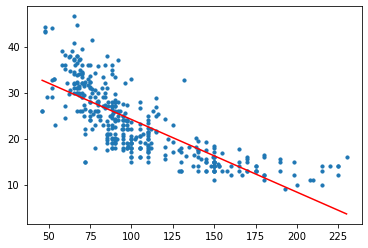

In [31]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
PolynomialFeatures()

In [33]:
polynomial_features=PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
polynomial_features.fit_transform()

In [34]:
polynomial_features.fit_transform(x)

array([[4.6000e+01, 2.1160e+03],
       [4.6000e+01, 2.1160e+03],
       [4.8000e+01, 2.3040e+03],
       [4.8000e+01, 2.3040e+03],
       [4.8000e+01, 2.3040e+03],
       [4.9000e+01, 2.4010e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.3000e+01, 2.8090e+03],
       [5.3000e+01, 2.8090e+03],
       [5.4000e+01, 2.9160e+03],
       [5.8000e+01, 3.3640e+03],
       [5.8000e+01, 3.3640e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.1000e+01, 3.7210e+03],
       [6.2000e+01, 3.8440e+03],
       [6.2000e+01, 3.8440e+03],
       [6.3000e+01, 3.9690e+03],
       [6.3000e+01, 3.9690e+03],
       [6.3000e+01, 3.9690e+03],
       [6.4000e+01, 4.0960e+03],
       [6.5000e+01, 4.2250e+03],
       [6.5000e+01, 4.2250e+03],
       [6.5000e+01, 4.2250e+03],
       [6.

In [35]:
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[4.6000e+01, 2.1160e+03],
       [4.6000e+01, 2.1160e+03],
       [4.8000e+01, 2.3040e+03],
       [4.8000e+01, 2.3040e+03],
       [4.8000e+01, 2.3040e+03],
       [4.9000e+01, 2.4010e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.2000e+01, 2.7040e+03],
       [5.3000e+01, 2.8090e+03],
       [5.3000e+01, 2.8090e+03],
       [5.4000e+01, 2.9160e+03],
       [5.8000e+01, 3.3640e+03],
       [5.8000e+01, 3.3640e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.0000e+01, 3.6000e+03],
       [6.1000e+01, 3.7210e+03],
       [6.2000e+01, 3.8440e+03],
       [6.2000e+01, 3.8440e+03],
       [6.3000e+01, 3.9690e+03],
       [6.3000e+01, 3.9690e+03],
       [6.3000e+01, 3.9690e+03],
       [6.4000e+01, 4.0960e+03],
       [6.5000e+01, 4.2250e+03],
       [6.5000e+01, 4.2250e+03],
       [6.5000e+01, 4.2250e+03],
       [6.

In [36]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)

LinearRegression()

In [37]:
polymodel.intercept_

56.90009970211295

In [38]:
polymodel.coef_

array([-0.46618963,  0.00123054])

In [39]:
y_poly_pred = polymodel.predict(x_poly)

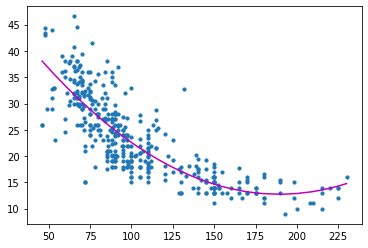

In [40]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [41]:
polynomial_features= PolynomialFeatures(degree=3,include_bias=False)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[4.6000000e+01, 2.1160000e+03, 9.7336000e+04],
       [4.6000000e+01, 2.1160000e+03, 9.7336000e+04],
       [4.8000000e+01, 2.3040000e+03, 1.1059200e+05],
       ...,
       [2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [2.3000000e+02, 5.2900000e+04, 1.2167000e+07]])

In [42]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)

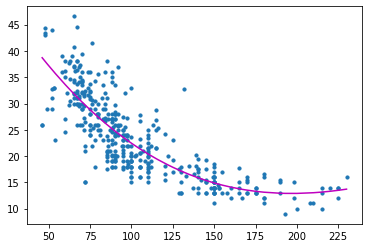

In [43]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [44]:
polynomial_features= PolynomialFeatures(degree=10,include_bias=False)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[4.60000000e+01, 2.11600000e+03, 9.73360000e+04, ...,
        2.00476122e+13, 9.22190163e+14, 4.24207475e+16],
       [4.60000000e+01, 2.11600000e+03, 9.73360000e+04, ...,
        2.00476122e+13, 9.22190163e+14, 4.24207475e+16],
       [4.80000000e+01, 2.30400000e+03, 1.10592000e+05, ...,
        2.81792804e+13, 1.35260546e+15, 6.49250621e+16],
       ...,
       [2.25000000e+02, 5.06250000e+04, 1.13906250e+07, ...,
        6.56840836e+18, 1.47789188e+21, 3.32525673e+23],
       [2.25000000e+02, 5.06250000e+04, 1.13906250e+07, ...,
        6.56840836e+18, 1.47789188e+21, 3.32525673e+23],
       [2.30000000e+02, 5.29000000e+04, 1.21670000e+07, ...,
        7.83109853e+18, 1.80115266e+21, 4.14265112e+23]])

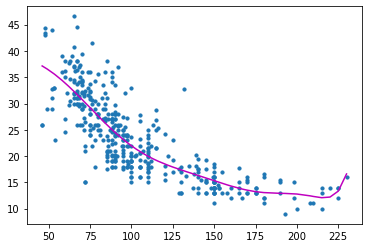

In [45]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)

31.72201024056559
0.46003770924907117


In [50]:
polynomial_features= PolynomialFeatures(degree=4,include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

In [52]:
X_poly_train

array([[8.8000000e+01, 7.7440000e+03, 6.8147200e+05, 5.9969536e+07],
       [1.9000000e+02, 3.6100000e+04, 6.8590000e+06, 1.3032100e+09],
       [7.0000000e+01, 4.9000000e+03, 3.4300000e+05, 2.4010000e+07],
       ...,
       [6.0000000e+01, 3.6000000e+03, 2.1600000e+05, 1.2960000e+07],
       [8.3000000e+01, 6.8890000e+03, 5.7178700e+05, 4.7458321e+07],
       [1.1000000e+02, 1.2100000e+04, 1.3310000e+06, 1.4641000e+08]])

In [53]:
polymodel = LinearRegression()
polymodel.fit(X_poly_train, y_train)
y_poly_pred = polymodel.predict(X_poly_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)
print(mse)
print(r2)

26.932769727490186
0.5415586866015847
